In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

function power_mc(μ_null, dist_alt, n; α=0.05, L=10^5)
    nths = Threads.nthreads()
    n_reject = zeros(Int, nths)
    Xtmp = [Vector{Float64}(undef, n) for _ in 1:nths]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(dist_alt, Xtmp[tid])
        x̄, s² = mean(X), var(X)
        t = (x̄ - μ_null)/√(s²/n)
        pval = 2ccdf(TDist(n-1), abs(t))
        n_reject[tid] += (pval < α)
    end
    sum(n_reject)/L
end

function power_approx(μ_null, dist_alt, n; α=0.05)
    μ_alt, σ = mean(dist_alt), std(dist_alt)
    dist_tstat_alt = (μ_alt - μ_null)/(σ/√n) + TDist(n-1)
    c = quantile(TDist(n-1), 1-α/2)
    cdf(dist_tstat_alt, -c) + ccdf(dist_tstat_alt, c)
end

power_approx (generic function with 1 method)

  3.840778 seconds (14.15 M allocations: 3.297 GiB, 14.55% gc time, 303.02% compilation time: 5% of which was recompilation)
  0.357046 seconds (1.04 M allocations: 70.428 MiB, 3.37% gc time, 99.36% compilation time)


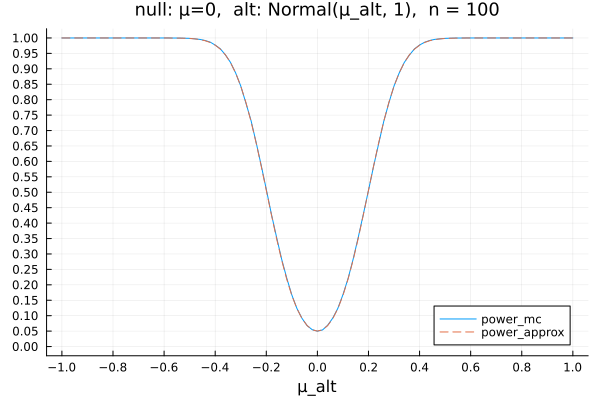

In [2]:
n = 100
μ_alt = range(-1, 1, 101)
@time plot(μ_alt, μ_alt -> power_mc(0.0, Normal(μ_alt, 1.0), n), label="power_mc")
@time plot!(μ_alt, μ_alt -> power_approx(0.0, Normal(μ_alt, 1.0), n), label="power_approx", ls=:dash)
plot!(ylim=(-0.03, 1.03))
plot!(xtick=-1:0.2:1, ytick=0:0.05:1)
plot!(xguide="μ_alt")
title!("null: μ=0,  alt: Normal(μ_alt, 1),  n = $n", titlefontsize=12)

  2.078821 seconds (11.07 M allocations: 3.122 GiB, 20.42% gc time, 2.27% compilation time)
  0.064672 seconds (58.05 k allocations: 4.007 MiB, 97.38% compilation time)


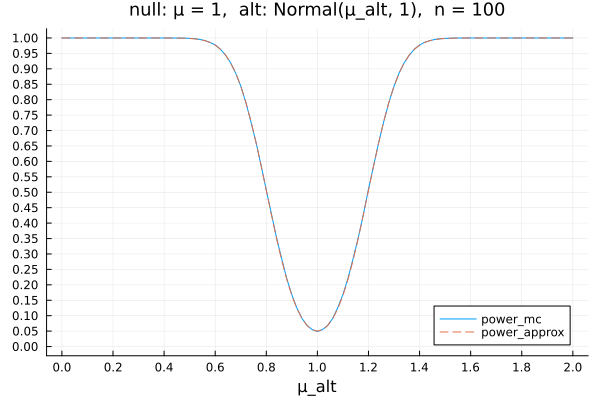

In [3]:
n = 100
μ_alt = range(0, 2, 101)
@time plot(μ_alt, μ_alt -> power_mc(1.0, Normal(μ_alt, 1.0), n), label="power_mc")
@time plot!(μ_alt, μ_alt -> power_approx(1.0, Normal(μ_alt, 1.0), n), label="power_approx", ls=:dash)
plot!(ylim=(-0.03, 1.03))
plot!(xtick=0:0.2:2, ytick=0:0.05:1)
plot!(xguide="μ_alt")
title!("null: μ = 1,  alt: Normal(μ_alt, 1),  n = $n", titlefontsize=12)

  2.688069 seconds (16.10 M allocations: 4.546 GiB, 28.72% gc time, 4.08% compilation time)
  0.065286 seconds (58.14 k allocations: 4.038 MiB, 97.32% compilation time)


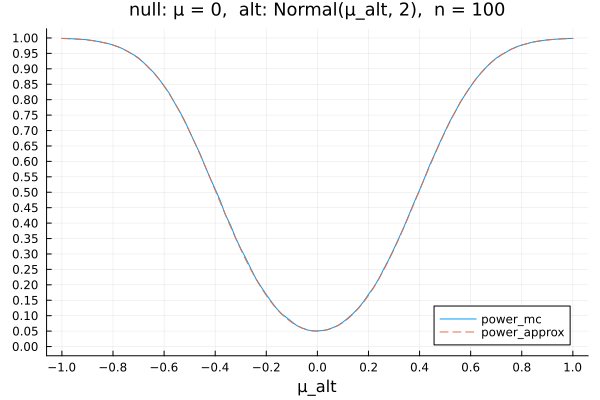

In [4]:
n = 100
μ_alt = range(-1, 1, 101)
@time plot(μ_alt, μ_alt -> power_mc(0.0, Normal(μ_alt, 2.0), n), label="power_mc")
@time plot!(μ_alt, μ_alt -> power_approx(0.0, Normal(μ_alt, 2.0), n), label="power_approx", ls=:dash)
plot!(ylim=(-0.03, 1.03))
plot!(xtick=-1:0.2:1, ytick=0:0.05:1)
plot!(xguide="μ_alt")
title!("null: μ = 0,  alt: Normal(μ_alt, 2),  n = $n", titlefontsize=12)

  6.900707 seconds (15.18 M allocations: 4.239 GiB, 8.51% gc time, 23.47% compilation time)
  0.154695 seconds (79.57 k allocations: 5.445 MiB, 47.38% gc time, 99.02% compilation time)


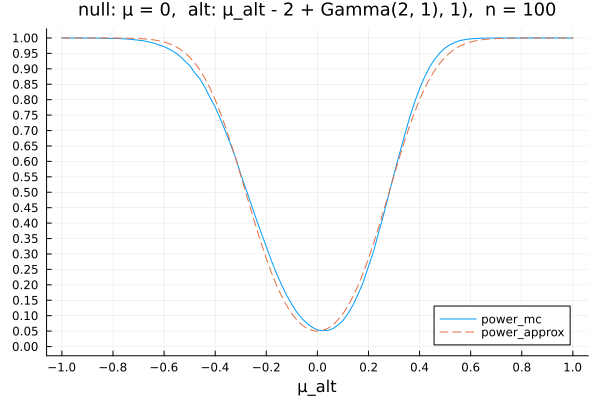

In [5]:
n = 100
μ_alt = range(-1, 1, 101)
@time plot(μ_alt, μ_alt -> power_mc(0.0, μ_alt - 2 + Gamma(2, 1), n), label="power_mc")
@time plot!(μ_alt, μ_alt -> power_approx(0.0, μ_alt - 2 + Gamma(2, 1), n), label="power_approx", ls=:dash)
plot!(ylim=(-0.03, 1.03))
plot!(xtick=-1:0.2:1, ytick=0:0.05:1)
plot!(xguide="μ_alt")
title!("null: μ = 0,  alt: μ_alt - 2 + Gamma(2, 1), 1),  n = $n", titlefontsize=12)

 22.341192 seconds (16.97 M allocations: 4.796 GiB, 3.09% gc time, 0.20% compilation time)
  0.066655 seconds (57.21 k allocations: 3.988 MiB, 97.65% compilation time)


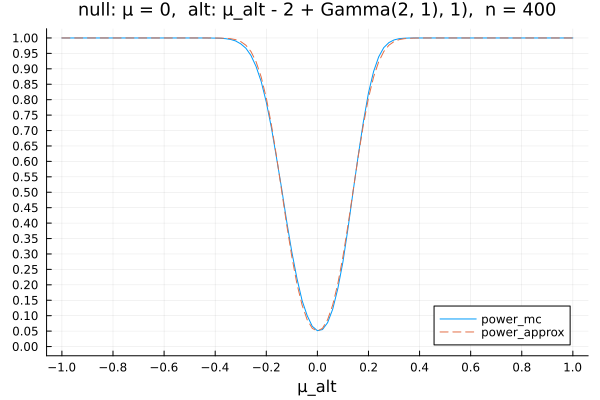

In [6]:
n = 400
μ_alt = range(-1, 1, 101)
@time plot(μ_alt, μ_alt -> power_mc(0.0, μ_alt - 2 + Gamma(2, 1), n), label="power_mc")
@time plot!(μ_alt, μ_alt -> power_approx(0.0, μ_alt - 2 + Gamma(2, 1), n), label="power_approx", ls=:dash)
plot!(ylim=(-0.03, 1.03))
plot!(xtick=-1:0.2:1, ytick=0:0.05:1)
plot!(xguide="μ_alt")
title!("null: μ = 0,  alt: μ_alt - 2 + Gamma(2, 1), 1),  n = $n", titlefontsize=12)